In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,356,032","3,938,628"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,736,129","1,660,179"


# Total Trips

In [6]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,104,318","14,231,175"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,399,372","5,095,149"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.51
survey,2.48


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       5.10     33.98      0.00
           survey      2.86     19.09      0.00
HOV2       model       9.43     20.79      2.05
           survey      6.93     16.90      0.06
HOV3+      model      10.01     21.59      2.16
           survey     10.35     20.96      0.11
SOV        model       9.78     21.82      2.04
           survey      8.54     19.56      0.16
School Bus model       3.64     11.44      0.73
TNC        model       2.26     10.08      0.48
           survey      3.72     13.44      0.01
Transit    model      11.13     43.05      1.40
           survey      7.45     32.32      3.08
Walk       model       0.68     13.66      0.00
           survey      0.80     17.50      0.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       2.88     19.22      0.00
           survey      2.04     12.26      0.00
HOV2       model       3.31     10.50      0.68
           survey      3.60     11.29      0.08
HOV3+      model       3.38     10.62      0.69
           survey      4.09     11.93      0.01
SOV        model       7.21     17.58      1.51
           survey      8.23     18.28      0.30
School Bus model       3.10     10.17      0.63
           survey      3.30     10.40      0.00
TNC        model       2.49      9.53      0.51
           survey      2.25     14.51      0.00
Transit    model       6.81     40.47      0.43
           survey      8.07     24.15      2.97
Walk       model       1.36     27.12      0.00
           survey      0.75     15.00      0.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,589,837","2,931,969"
1,"766,195","1,006,659"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,019",NaN
Full-Time Worker,"531,790","532,071"
High School Student Age 16+,"98,252",NaN
Non-Working Adult Age 65+,249,"160,319"
Non-Working Adult Age <65,"16,304","150,270"
Part-Time Worker,"40,237","136,436"
University Student,"77,344","27,562"


# Auto Ownership

In [13]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
-1.0,NaN,626
0.0,"163,887","166,015"
1.0,"490,925","489,872"
2.0,"607,497","608,416"
3+,"473,820","395,250"


## By Income

In [14]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
-1.0   model        0        0        0        0       0
       survey       0        0        0        0     626
0.0    model   66,496   26,760   17,704    6,523  46,383
       survey  83,091   36,089   10,782        0  36,053
1.0    model   61,213   71,310   75,563   35,784 246,954
       survey 112,204   84,824   87,913        0 204,932
2.0    model   27,926   40,265   55,939   32,279 450,996
       survey  97,708   28,394   82,252        0 400,062
3.0    model   10,711   16,566   23,959   14,400 250,230
       survey  47,799   10,876   22,726        0 177,862
4+     model    5,106    7,204   11,233    6,572 127,733
       survey  33,443    8,019    7,406        0  87,119

In [15]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

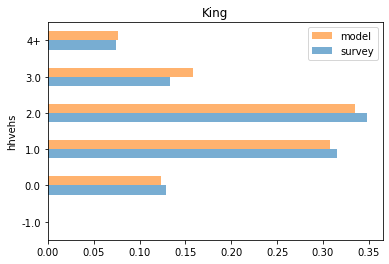

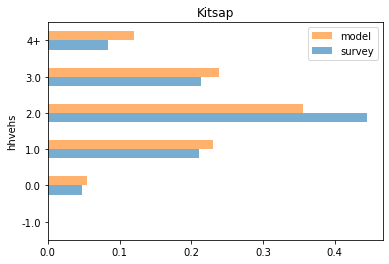

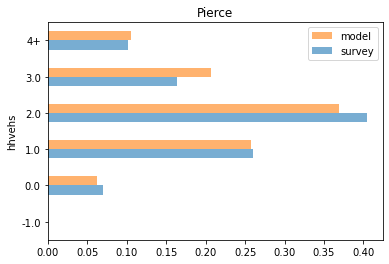

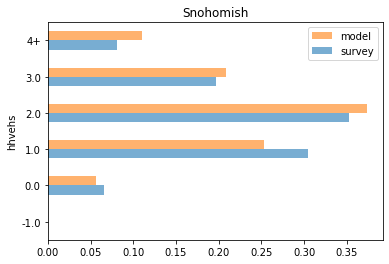

In [16]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [17]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                          
Work County      King  Kitsap  Pierce Snohomish
Home County                                    
King        1,175,294     921  43,342    39,232
Kitsap          5,123 109,548   4,756        46
Pierce         98,717   9,880 298,049       593
Snohomish     149,929      79     766   277,859